In [1]:
# imports
import numpy as np
import json
import copy
import itertools
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from group_features import group_features_by_conditions

`filter = 'unique' ` **and** <br>
`condition = ('by_nt_types', )` **or** <br>
`condition = ('by_annotators', )`

In [2]:
def plot_histogram(feature_name, condition, feature_values_by_condition, bins):
    
    feature_min = min([value for values in list(feature_values_by_condition.values()) for value in values])
    feature_max = max([value for values in list(feature_values_by_condition.values()) for value in values])
    
    for feature_condition, feature_values in feature_values_by_condition.items():
        
        # print(f'feature_condition')
        plt.hist(feature_values_by_condition[feature_condition], label=feature_condition,\
                 alpha=0.3, range=(feature_min,feature_max), bins=bins, density=True)
        
        print(f'{feature_condition} mean: {np.mean(feature_values)}')
        print(f'{feature_condition} stddev: {np.std(feature_values)}')
        
    
    plt.title(f'{feature_name} {condition}')
    plt.legend()
    plt.show()

In [3]:
def conduct_t_test(feature_values_by_condition):
    
    # e.g. [('c0', 'c1'), ('c0', 'c2'),('c1', 'c2')]
    condition_pairs_to_compare = list(itertools.combinations(list(feature_values_by_condition.keys()),2))
    
    for pair in condition_pairs_to_compare:
        feature_values_condition_1 = feature_values_by_condition[pair[0]]
        feature_values_condition_2 = feature_values_by_condition[pair[1]]
        
        t_statistic, p_value = list(ttest_ind(feature_values_condition_1, feature_values_condition_2))
        
        print(f'Compare {pair[0]} and {pair[1]}: t-statistics = {t_statistic}, p-value = {p_value}')

Run t-test for feature cleft_mean_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 2.5887921325207732, p-value = 0.010655507010539253
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 1.5460702310278147, p-value = 0.12459561021939461
Compare ('gaba',) and ('glutamate',): t-statistics = -0.7311966113539791, p-value = 0.4660497447621874


Histogram stats for cleft_mean_intensity: 

('acetylcholine',) mean: 88.54567611942913
('acetylcholine',) stddev: 11.946641740469795
('gaba',) mean: 83.75145021007141
('gaba',) stddev: 9.721141605383705
('glutamate',) mean: 85.19711668950016
('glutamate',) stddev: 12.20526868493287


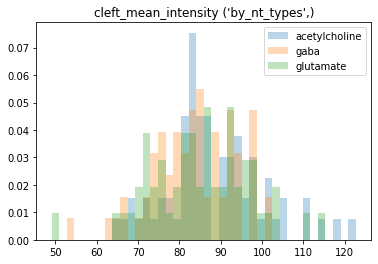

Run t-test for feature t-bars_mean_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 0.6026732245655163, p-value = 0.5476941666006754
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 3.052978946202121, p-value = 0.0027564106421310718
Compare ('gaba',) and ('glutamate',): t-statistics = 2.336712205661972, p-value = 0.02104487327967661


Histogram stats for t-bars_mean_intensity: 

('acetylcholine',) mean: 83.32587695224662
('acetylcholine',) stddev: 10.362986363807016
('gaba',) mean: 82.2386388392274
('gaba',) stddev: 11.057234195209897
('glutamate',) mean: 77.8191255084394
('glutamate',) stddev: 9.81382066073877


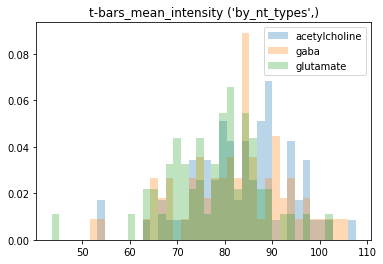

Run t-test for feature cleft_median_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 2.3861331573458155, p-value = 0.018373917738768265
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 1.53672599937663, p-value = 0.12686782652203543
Compare ('gaba',) and ('glutamate',): t-statistics = -0.5331867427942109, p-value = 0.5948664107359313


Histogram stats for cleft_median_intensity: 

('acetylcholine',) mean: 88.04861111111111
('acetylcholine',) stddev: 11.922830492793084
('gaba',) mean: 83.68115942028986
('gaba',) stddev: 9.458134683922768
('glutamate',) mean: 84.72321428571429
('glutamate',) stddev: 12.211279783629628


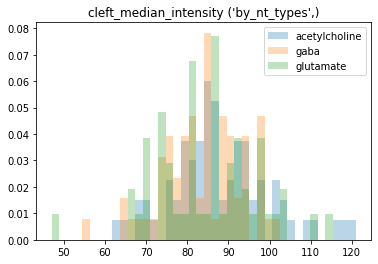

Run t-test for feature t-bars_median_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 0.708573243506113, p-value = 0.479759172007717
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 3.0036297012354205, p-value = 0.003209719638164327
Compare ('gaba',) and ('glutamate',): t-statistics = 2.1581302198422816, p-value = 0.032829399849445044


Histogram stats for t-bars_median_intensity: 

('acetylcholine',) mean: 83.52054794520548
('acetylcholine',) stddev: 10.883706043163912
('gaba',) mean: 82.16428571428571
('gaba',) stddev: 11.839619150659074
('glutamate',) mean: 77.8157894736842
('glutamate',) stddev: 10.371871364647822


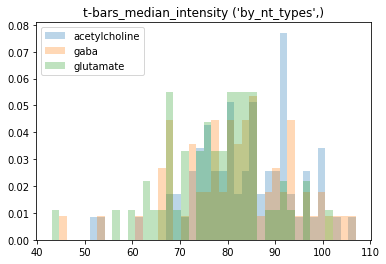

Run t-test for feature t-bars_mean_normalized_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 1.8721336562245305, p-value = 0.0632593354727172
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 3.5091377743388006, p-value = 0.0006210904187607518
Compare ('gaba',) and ('glutamate',): t-statistics = 2.042999111301044, p-value = 0.04315474506671965


Histogram stats for t-bars_mean_normalized_intensity: 

('acetylcholine',) mean: 0.06616123763957488
('acetylcholine',) stddev: 0.10006648251814641
('gaba',) mean: 0.0355100843613821
('gaba',) stddev: 0.09408356661551774
('glutamate',) mean: -0.0059964040979024495
('glutamate',) stddev: 0.13254255713361643


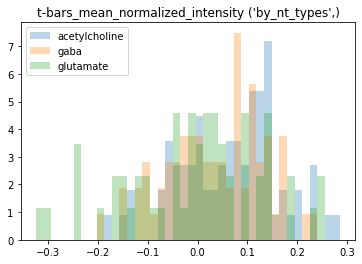

Run t-test for feature cleft_mean_normalized_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 7.689645133907537, p-value = 2.4358197620118365e-12
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 4.169761524788743, p-value = 5.628999842071729e-05
Compare ('gaba',) and ('glutamate',): t-statistics = -3.3484151343516104, p-value = 0.001079059075797149


Histogram stats for cleft_mean_normalized_intensity: 

('acetylcholine',) mean: 0.12657155304822695
('acetylcholine',) stddev: 0.06971119958718063
('gaba',) mean: 0.052653811431865975
('gaba',) stddev: 0.0385705454933833
('glutamate',) mean: 0.07985587788570776
('glutamate',) stddev: 0.051457747938861535


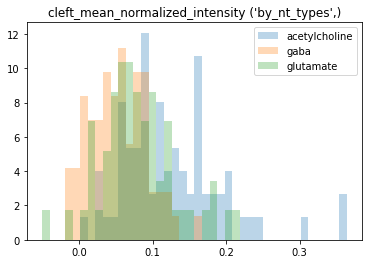

Run t-test for feature t-bars_median_normalized_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 1.7576285105739606, p-value = 0.08098090979195695
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 3.2938889332299834, p-value = 0.0012780320747426991
Compare ('gaba',) and ('glutamate',): t-statistics = 1.9320133074288681, p-value = 0.055620600853049935


Histogram stats for t-bars_median_normalized_intensity: 

('acetylcholine',) mean: 0.06829871256476946
('acetylcholine',) stddev: 0.11096933384291881
('gaba',) mean: 0.036979301284107015
('gaba',) stddev: 0.10006465618044591
('glutamate',) mean: -0.0042824439627089554
('glutamate',) stddev: 0.13830655257071128


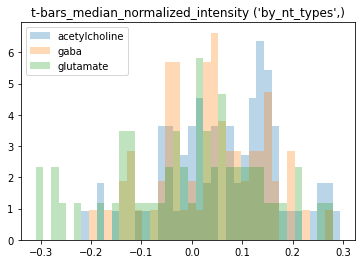

Run t-test for feature cleft_median_normalized_intensity: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 7.132983008854291, p-value = 4.930410759930659e-11
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 4.100948930069296, p-value = 7.3273631587604e-05
Compare ('gaba',) and ('glutamate',): t-statistics = -2.8660293697598886, p-value = 0.0048907598562754895


Histogram stats for cleft_median_normalized_intensity: 

('acetylcholine',) mean: 0.12248334702398246
('acetylcholine',) stddev: 0.07001560908386169
('gaba',) mean: 0.053067516802864464
('gaba',) stddev: 0.040084201122605634
('glutamate',) mean: 0.07656363812845246
('glutamate',) stddev: 0.05082837234906876


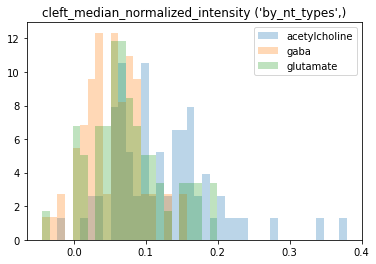

Run t-test for feature post_count: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = -3.3826201194850967, p-value = 0.0009295686111695694
Compare ('acetylcholine',) and ('glutamate',): t-statistics = -0.5436145903378686, p-value = 0.5876522645231692
Compare ('gaba',) and ('glutamate',): t-statistics = 2.569840999457861, p-value = 0.011348209245846796


Histogram stats for post_count: 

('acetylcholine',) mean: 3.6164383561643834
('acetylcholine',) stddev: 1.3811860793991753
('gaba',) mean: 4.485714285714286
('gaba',) stddev: 1.6625527458258462
('glutamate',) mean: 3.754385964912281
('glutamate',) stddev: 1.4782718900309402


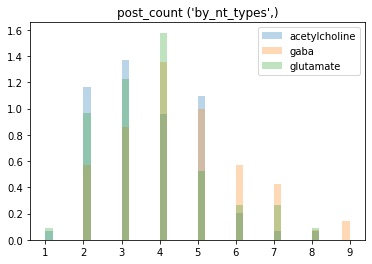

Run t-test for feature num_vesicles: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 1.2863908008713536, p-value = 0.20041491918174845
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 1.1111388646918037, p-value = 0.26859138202125465
Compare ('gaba',) and ('glutamate',): t-statistics = -0.02867763932464915, p-value = 0.9771674257001015


Histogram stats for num_vesicles: 

('acetylcholine',) mean: 21.013698630136986
('acetylcholine',) stddev: 11.862792240648599
('gaba',) mean: 18.62857142857143
('gaba',) stddev: 10.034471199066642
('glutamate',) mean: 18.68421052631579
('glutamate',) stddev: 11.64859436552414


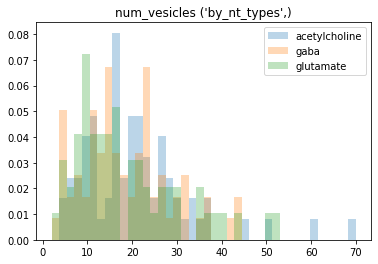

Run t-test for feature vesicle_sizes: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = 2.105426503781829, p-value = 0.0353419150021274
Compare ('acetylcholine',) and ('glutamate',): t-statistics = -1.1789437137715426, p-value = 0.2385285892511732
Compare ('gaba',) and ('glutamate',): t-statistics = -3.376227810014263, p-value = 0.0007467388645846268


Histogram stats for vesicle_sizes: 

('acetylcholine',) mean: 74.3794002607562
('acetylcholine',) stddev: 51.776782392754974
('gaba',) mean: 70.69938650306749
('gaba',) stddev: 39.1083927052969
('glutamate',) mean: 76.74366197183099
('glutamate',) stddev: 47.99024763720337


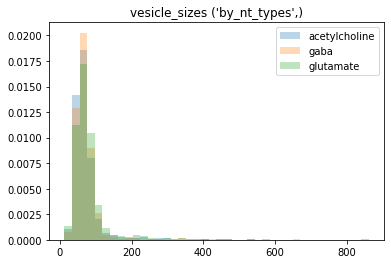

Run t-test for feature vesicle_eccentricities: 

Compare ('acetylcholine',) and ('gaba',): t-statistics = -3.310197851286597, p-value = 0.0009439663609771134
Compare ('acetylcholine',) and ('glutamate',): t-statistics = 0.5354576020713442, p-value = 0.5923793168578255
Compare ('gaba',) and ('glutamate',): t-statistics = 3.547143295141287, p-value = 0.0003970016392068774


Histogram stats for vesicle_eccentricities: 

('acetylcholine',) mean: 0.4760676455996075
('acetylcholine',) stddev: 0.1760040122420606
('gaba',) mean: 0.4976697801176883
('gaba',) stddev: 0.16983067904151777
('glutamate',) mean: 0.47229821368061875
('glutamate',) stddev: 0.17703739425081969


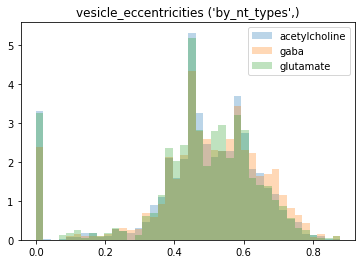

Run t-test for feature cleft_mean_intensity: 

Compare ('a0',) and ('a1',): t-statistics = 0.12559655139254763, p-value = 0.9002597352841147
Compare ('a0',) and ('a2',): t-statistics = -1.393038145326742, p-value = 0.16594984315110517
Compare ('a1',) and ('a2',): t-statistics = -1.4453795291566207, p-value = 0.15066865387645295


Histogram stats for cleft_mean_intensity: 

('a0',) mean: 85.0019631691321
('a0',) stddev: 10.697411986882067
('a1',) mean: 84.73660378614255
('a1',) stddev: 12.429522116612295
('a2',) mean: 87.65747906798548
('a2',) stddev: 11.045105211794166


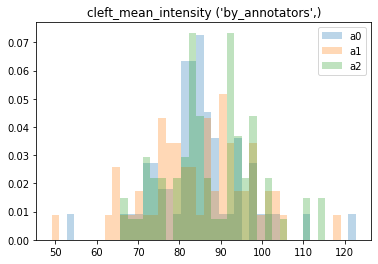

Run t-test for feature t-bars_mean_intensity: 

Compare ('a0',) and ('a1',): t-statistics = -3.69761493152622, p-value = 0.0003264241458675053
Compare ('a0',) and ('a2',): t-statistics = -1.1103760264511098, p-value = 0.26881086072140686
Compare ('a1',) and ('a2',): t-statistics = 2.3807721323758, p-value = 0.018662838902476046


Histogram stats for t-bars_mean_intensity: 

('a0',) mean: 78.57174605021586
('a0',) stddev: 9.969345956683368
('a1',) mean: 84.99085985726299
('a1',) stddev: 9.276443372017384
('a2',) mean: 80.65748618826686
('a2',) stddev: 11.550228932855376


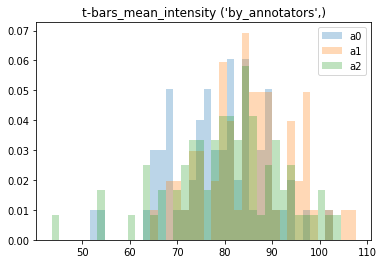

Run t-test for feature cleft_median_intensity: 

Compare ('a0',) and ('a1',): t-statistics = 0.27326686318813603, p-value = 0.785113954786714
Compare ('a0',) and ('a2',): t-statistics = -1.3249521593309375, p-value = 0.18747604687645858
Compare ('a1',) and ('a2',): t-statistics = -1.5333101262250048, p-value = 0.12753964477300986


Histogram stats for cleft_median_intensity: 

('a0',) mean: 84.81666666666666
('a0',) stddev: 10.55263263624559
('a1',) mean: 84.24603174603175
('a1',) stddev: 12.301397848003504
('a2',) mean: 87.31756756756756
('a2',) stddev: 10.96757331197484


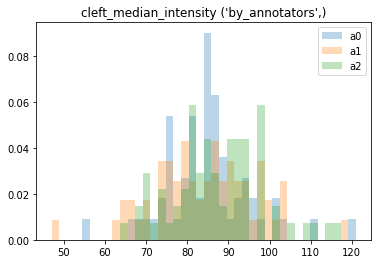

Run t-test for feature t-bars_median_intensity: 

Compare ('a0',) and ('a1',): t-statistics = -4.013589804642753, p-value = 0.00010320404769307504
Compare ('a0',) and ('a2',): t-statistics = -1.231420259267731, p-value = 0.22030656732781614
Compare ('a1',) and ('a2',): t-statistics = 2.4609658036887523, p-value = 0.015109017675019406


Histogram stats for t-bars_median_intensity: 

('a0',) mean: 78.2258064516129
('a0',) stddev: 10.448289495505657
('a1',) mean: 85.42857142857143
('a1',) stddev: 9.436444524330707
('a2',) mean: 80.69333333333333
('a2',) stddev: 12.452548155118915


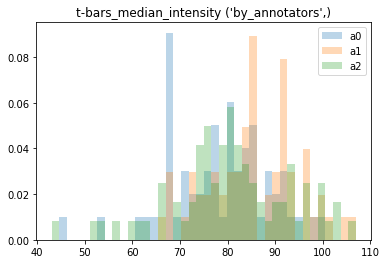

Run t-test for feature t-bars_mean_normalized_intensity: 

Compare ('a0',) and ('a1',): t-statistics = -3.1374779577291445, p-value = 0.002132865459282293
Compare ('a0',) and ('a2',): t-statistics = -0.5605468458091319, p-value = 0.5760355972525445
Compare ('a1',) and ('a2',): t-statistics = 2.8011392431761, p-value = 0.0058351482677993765


Histogram stats for t-bars_mean_normalized_intensity: 

('a0',) mean: 0.011240869660189718
('a0',) stddev: 0.11284309823866784
('a1',) mean: 0.07359173962813317
('a1',) stddev: 0.10752972265722772
('a2',) mean: 0.021872902718681593
('a2',) stddev: 0.10701812246850494


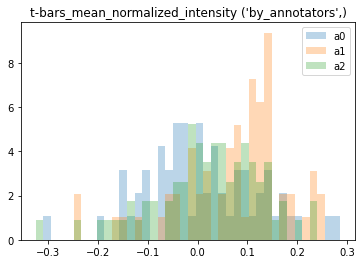

Run t-test for feature cleft_mean_normalized_intensity: 

Compare ('a0',) and ('a1',): t-statistics = 0.4833449899892134, p-value = 0.6297242796239944
Compare ('a0',) and ('a2',): t-statistics = -1.195317181641591, p-value = 0.2341061923133623
Compare ('a1',) and ('a2',): t-statistics = -1.804215547399791, p-value = 0.073426951306438


Histogram stats for cleft_mean_normalized_intensity: 

('a0',) mean: 0.0837272723989749
('a0',) stddev: 0.06530743304700973
('a1',) mean: 0.07856363513646875
('a1',) stddev: 0.05171505999791955
('a2',) mean: 0.09790606232884733
('a2',) stddev: 0.06970068597553868


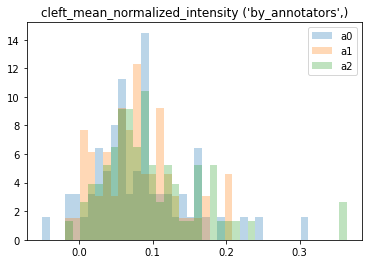

Run t-test for feature t-bars_median_normalized_intensity: 

Compare ('a0',) and ('a1',): t-statistics = -3.289687510905533, p-value = 0.0013085809118865634
Compare ('a0',) and ('a2',): t-statistics = -0.7506019903270977, p-value = 0.4541985133768831
Compare ('a1',) and ('a2',): t-statistics = 2.7236051119609055, p-value = 0.007304999832643573


Histogram stats for t-bars_median_normalized_intensity: 

('a0',) mean: 0.00923626558248224
('a0',) stddev: 0.1211524891792854
('a1',) mean: 0.07794064303498281
('a1',) stddev: 0.11029571825016603
('a2',) mean: 0.02463131765231249
('a2',) stddev: 0.1164779643628591


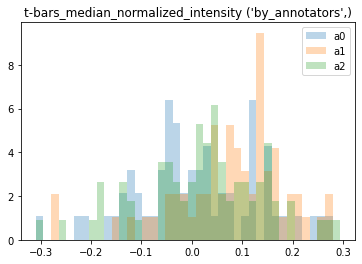

Run t-test for feature cleft_median_normalized_intensity: 

Compare ('a0',) and ('a1',): t-statistics = 1.024691635549173, p-value = 0.3075529120800711
Compare ('a0',) and ('a2',): t-statistics = -1.0928789498224323, p-value = 0.27643747398943247
Compare ('a1',) and ('a2',): t-statistics = -2.2066998204148067, p-value = 0.029025086589047934


Histogram stats for cleft_median_normalized_intensity: 

('a0',) mean: 0.08384126572138781
('a0',) stddev: 0.06348813223038476
('a1',) mean: 0.07295593784786238
('a1',) stddev: 0.053122728155996855
('a2',) mean: 0.09650436962998818
('a2',) stddev: 0.06831549427702477


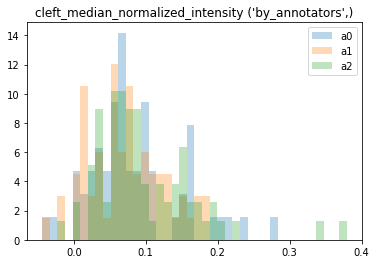

Run t-test for feature post_count: 

Compare ('a0',) and ('a1',): t-statistics = 0.10152832946316317, p-value = 0.9192963912674238
Compare ('a0',) and ('a2',): t-statistics = -1.5746439257193772, p-value = 0.11767928561699516
Compare ('a1',) and ('a2',): t-statistics = -1.8132993396115684, p-value = 0.07199070279698265


Histogram stats for post_count: 

('a0',) mean: 3.806451612903226
('a0',) stddev: 1.6833023387935162
('a1',) mean: 3.7777777777777777
('a1',) stddev: 1.4413887091741575
('a2',) mean: 4.24
('a2',) stddev: 1.5129661816004567


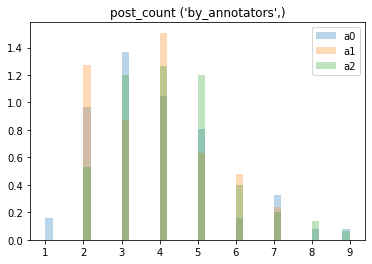

Run t-test for feature num_vesicles: 

Compare ('a0',) and ('a1',): t-statistics = -0.25238526878342493, p-value = 0.801164553239944
Compare ('a0',) and ('a2',): t-statistics = 1.3627260418848388, p-value = 0.17523774592856844
Compare ('a1',) and ('a2',): t-statistics = 1.5766114309054822, p-value = 0.11720825718526558


Histogram stats for num_vesicles: 

('a0',) mean: 20.258064516129032
('a0',) stddev: 11.458108108025186
('a1',) mean: 20.80952380952381
('a1',) stddev: 12.730237897074028
('a2',) mean: 17.813333333333333
('a2',) stddev: 9.386079527091644


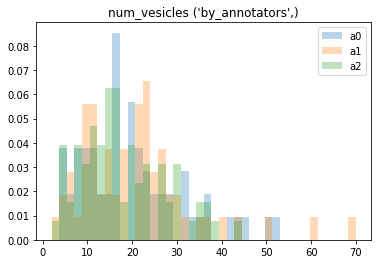

Run t-test for feature vesicle_sizes: 

Compare ('a0',) and ('a1',): t-statistics = 5.186287059740297, p-value = 2.312748874302295e-07
Compare ('a0',) and ('a2',): t-statistics = 8.752986766368398, p-value = 3.6746128028745454e-18
Compare ('a1',) and ('a2',): t-statistics = 4.64552887396504, p-value = 3.5580595530297965e-06


Histogram stats for vesicle_sizes: 

('a0',) mean: 82.99203821656052
('a0',) stddev: 56.61401269496176
('a1',) mean: 73.13348588863462
('a1',) stddev: 38.26464153417278
('a2',) mean: 65.79790419161677
('a2',) stddev: 42.774347289312885


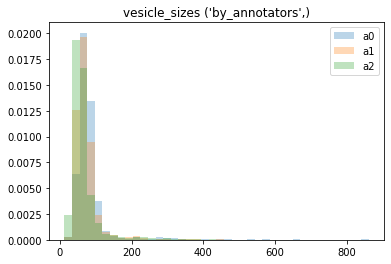

Run t-test for feature vesicle_eccentricities: 

Compare ('a0',) and ('a1',): t-statistics = 14.76412690988563, p-value = 2.0840642959440421e-47
Compare ('a0',) and ('a2',): t-statistics = 1.533153457776304, p-value = 0.12536018246920483
Compare ('a1',) and ('a2',): t-statistics = -12.264707274439747, p-value = 1.1310925807580946e-33


Histogram stats for vesicle_eccentricities: 

('a0',) mean: 0.5179826185542956
('a0',) stddev: 0.13549058618023418
('a1',) mean: 0.42127833877942766
('a1',) stddev: 0.1904079203575088
('a2',) mean: 0.5085065031056117
('a2',) stddev: 0.1751759727458395


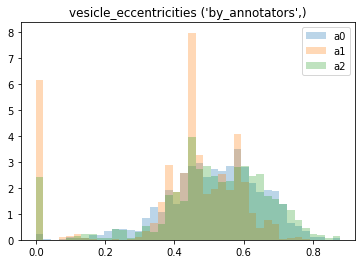

In [4]:
### structrue of grouped_features ###
#     {
#         'vesicle_sizes': {
#             ('c0',): [....],                                                                                                                                 
#             ('c1',): [....],
#             ('c2',): [....]
#         }
#     }

conditions = [('by_nt_types',), ('by_annotators',)]

for condition in conditions:
    
    grouped_features = group_features_by_conditions(condition)

    for feature_name, feature_values_by_condition in grouped_features.items():
        
        print(f'Run t-test for feature {feature_name}:', '\n')
        conduct_t_test(feature_values_by_condition)        
        
        print('\n')
        print(f'Histogram stats for {feature_name}:', '\n')
        plot_histogram(feature_name, condition, feature_values_by_condition, 40)


`filter = 'unique' ` **and** `condition = ('by_nt_types', 'by_annotators')`

In [5]:

condition = ('by_annotators', 'by_nt_types')

# 'vesicle_sizes': {
#             ('c0', 'glutamate'): [....],
#             ('c0', 'gaba'): [....],
#             ('c0', 'acetylcholine'): [....],
#             ...
#             ('c1', 'glutamate'): [....],
#             ('c1', 'gaba'): [....]
#             ...
#          }

All feature conditions: [('a0', 'acetylcholine'), ('a0', 'gaba'), ('a0', 'glutamate'), ('a1', 'acetylcholine'), ('a1', 'glutamate'), ('a1', 'gaba'), ('a2', 'gaba'), ('a2', 'acetylcholine'), ('a2', 'glutamate')] 

Run t-test for feature cleft_mean_intensity by annotator a0: 

Compare acetylcholine and gaba: t-statistics = 1.8205933283444913, p-value = 0.07547402860710523
Compare acetylcholine and glutamate: t-statistics = 0.8013364403141577, p-value = 0.4280532428466326
Compare gaba and glutamate: t-statistics = -1.0013217872310185, p-value = 0.32395744692939


Histogram stats for cleft_mean_intensity by annotator a0: 

acetylcholine mean: 87.82736179412967
acetylcholine stddev: 12.228223501229397
gaba mean: 81.73296844207361
gaba stddev: 9.484129977928148
glutamate mean: 84.86010057222416
glutamate stddev: 7.628196993404234


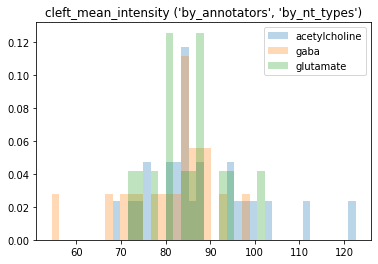

Run t-test for feature cleft_mean_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 1.043310632201374, p-value = 0.3029172852166698
Compare acetylcholine and gaba: t-statistics = 1.1041902595216493, p-value = 0.275948991568879
Compare glutamate and gaba: t-statistics = -0.0965363197921054, p-value = 0.9236019772042903


Histogram stats for cleft_mean_intensity by annotator a1: 

acetylcholine mean: 87.27508663360355
acetylcholine stddev: 11.023281948647378
glutamate mean: 83.07424998145487
glutamate stddev: 14.69011911764811
gaba mean: 83.47970231625013
gaba stddev: 10.925202784494886


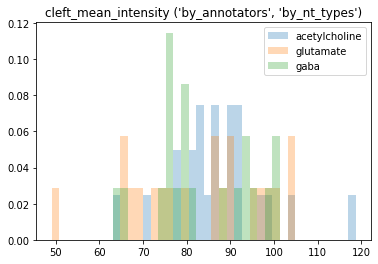

Run t-test for feature cleft_mean_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = -1.7046192675362406, p-value = 0.09447265027743545
Compare gaba and glutamate: t-statistics = -0.6412219492578779, p-value = 0.5244285444959628
Compare acetylcholine and glutamate: t-statistics = 0.8756800023046415, p-value = 0.38595953836233443


Histogram stats for cleft_mean_intensity by annotator a2: 

gaba mean: 85.45941717451349
gaba stddev: 8.610002309749593
acetylcholine mean: 90.51156846553226
acetylcholine stddev: 12.247769215701219
glutamate mean: 87.34146031689885
glutamate stddev: 11.713852037576908


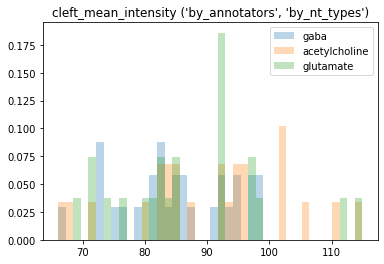

Run t-test for feature t-bars_mean_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -1.0841505199799752, p-value = 0.28495499963644905
Compare glutamate and gaba: t-statistics = 0.907864366917243, p-value = 0.3703400958888774
Compare acetylcholine and gaba: t-statistics = 2.121206347885742, p-value = 0.039446972404566585


Histogram stats for t-bars_mean_intensity by annotator a0: 

glutamate mean: 78.02191226696013
glutamate stddev: 8.378040053897777
acetylcholine mean: 81.57065757962027
acetylcholine stddev: 10.60103756957412
gaba mean: 75.2515463828026
gaba stddev: 9.043226227534168


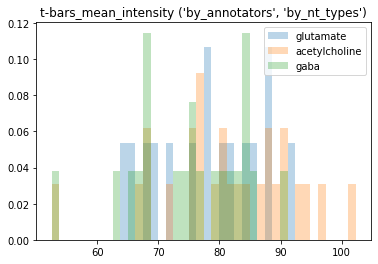

Run t-test for feature t-bars_mean_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 3.384754778645161, p-value = 0.001579893932469778
Compare acetylcholine and gaba: t-statistics = 1.1920763914390702, p-value = 0.2400855651023669
Compare glutamate and gaba: t-statistics = -1.9979410950611631, p-value = 0.05291732795717543


Histogram stats for t-bars_mean_intensity by annotator a1: 

acetylcholine mean: 88.78695016909211
acetylcholine stddev: 7.788210985177477
glutamate mean: 79.92231793599527
glutamate stddev: 8.981478465085486
gaba mean: 85.69389791992724
gaba stddev: 8.825373544382868


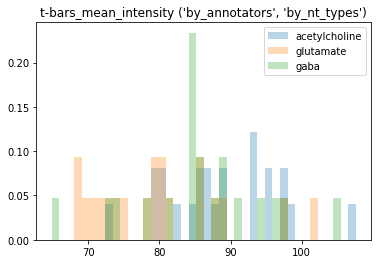

Run t-test for feature t-bars_mean_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 1.6044432864632503, p-value = 0.11479189696368367
Compare gaba and glutamate: t-statistics = 2.8189033037398206, p-value = 0.006933003912959481
Compare acetylcholine and glutamate: t-statistics = 1.3253907109266658, p-value = 0.1918827149292627


Histogram stats for t-bars_mean_intensity by annotator a2: 

gaba mean: 84.91532021753514
gaba stddev: 11.464319139628175
acetylcholine mean: 79.99383610644823
acetylcholine stddev: 10.185889577242468
glutamate mean: 75.76886869348812
glutamate stddev: 10.958507536262141


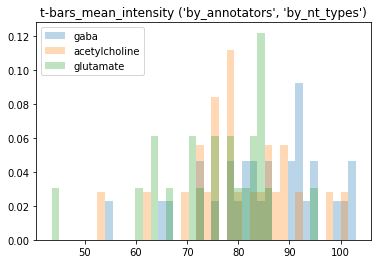

Run t-test for feature cleft_median_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -0.7414144818859449, p-value = 0.4631223369039371
Compare glutamate and gaba: t-statistics = 0.9182362226283518, p-value = 0.3651581793373869
Compare acetylcholine and gaba: t-statistics = 1.6790586437633837, p-value = 0.10022955146241239


Histogram stats for cleft_median_intensity by annotator a0: 

glutamate mean: 84.67857142857143
glutamate stddev: 7.596068397667363
acetylcholine mean: 87.4
acetylcholine stddev: 12.109500402576483
gaba mean: 81.83333333333333
gaba stddev: 9.395203098913894


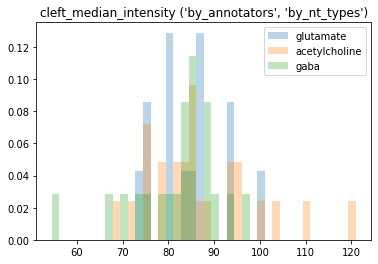

Run t-test for feature cleft_median_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 1.1014527963233407, p-value = 0.27712398728022086
Compare acetylcholine and gaba: t-statistics = 0.9928901628232772, p-value = 0.32658739467123843
Compare glutamate and gaba: t-statistics = -0.2538239325810565, p-value = 0.8009999698173726


Histogram stats for cleft_median_intensity by annotator a1: 

acetylcholine mean: 86.71739130434783
acetylcholine stddev: 11.030418501813147
glutamate mean: 82.3
glutamate stddev: 14.588008774332431
gaba mean: 83.35
gaba stddev: 10.598466870260058


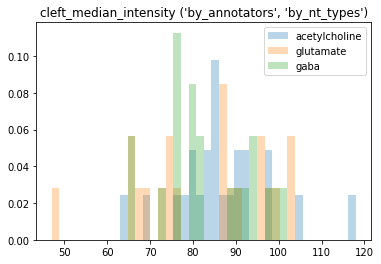

Run t-test for feature cleft_median_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = -1.6020821087234491, p-value = 0.1154371148607087
Compare gaba and glutamate: t-statistics = -0.5686850166093609, p-value = 0.5722212065501636
Compare acetylcholine and glutamate: t-statistics = 0.8369241193233123, p-value = 0.4071579536247866


Histogram stats for cleft_median_intensity by annotator a2: 

gaba mean: 85.30357142857143
gaba stddev: 8.290850470887305
acetylcholine mean: 90.0
acetylcholine stddev: 12.294985427671993
glutamate mean: 86.95454545454545
glutamate stddev: 11.792629719552773


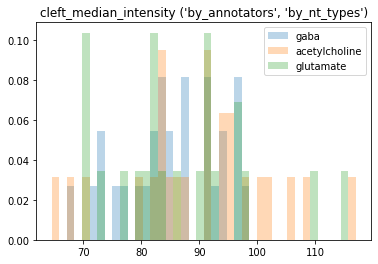

Run t-test for feature t-bars_median_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -1.1535732414165447, p-value = 0.25569600503182455
Compare glutamate and gaba: t-statistics = 1.141456044658844, p-value = 0.26165607728844525
Compare acetylcholine and gaba: t-statistics = 2.4335368823340264, p-value = 0.018986900490427606


Histogram stats for t-bars_median_intensity by annotator a0: 

glutamate mean: 77.83333333333333
glutamate stddev: 8.621033709609435
acetylcholine mean: 81.71153846153847
acetylcholine stddev: 10.880622398878764
gaba mean: 74.19047619047619
gaba stddev: 9.549964086788856


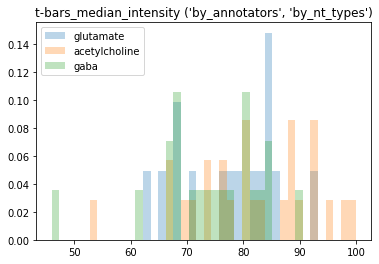

Run t-test for feature t-bars_median_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 3.0370715678665374, p-value = 0.004142025010755131
Compare acetylcholine and gaba: t-statistics = 0.9993717175614867, p-value = 0.32347657728353874
Compare glutamate and gaba: t-statistics = -1.78952514343041, p-value = 0.08150259468480069


Histogram stats for t-bars_median_intensity by annotator a1: 

acetylcholine mean: 88.84782608695652
acetylcholine stddev: 7.603538625004029
glutamate mean: 80.725
glutamate stddev: 9.507201218024157
gaba mean: 86.2
gaba stddev: 9.35200513259055


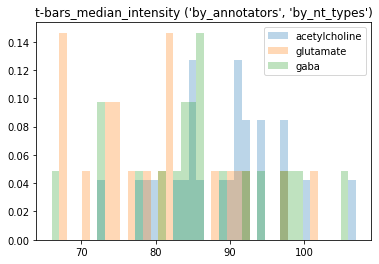

Run t-test for feature t-bars_median_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 1.4292421644386448, p-value = 0.15903166653801912
Compare gaba and glutamate: t-statistics = 2.9346055086815035, p-value = 0.005070570469174105
Compare acetylcholine and glutamate: t-statistics = 1.4948532892733712, p-value = 0.14209075634582585


Histogram stats for t-bars_median_intensity by annotator a2: 

gaba mean: 85.15517241379311
gaba stddev: 12.073841379607762
acetylcholine mean: 80.375
acetylcholine stddev: 11.662127093002088
glutamate mean: 75.1590909090909
glutamate stddev: 11.450869720478522


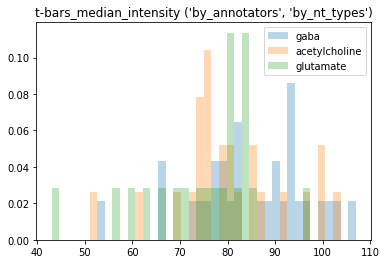

Run t-test for feature t-bars_mean_normalized_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -1.5794047106767206, p-value = 0.12232082593396025
Compare glutamate and gaba: t-statistics = 0.2771340936991133, p-value = 0.7833551721475269
Compare acetylcholine and gaba: t-statistics = 2.479842681699198, p-value = 0.016953682489040615


Histogram stats for t-bars_mean_normalized_intensity by annotator a0: 

glutamate mean: -0.0118925210405874
glutamate stddev: 0.13206653652736447
acetylcholine mean: 0.05131536936757681
acetylcholine stddev: 0.11309173862938174
gaba mean: -0.021851327096020164
gaba stddev: 0.07639023229882295


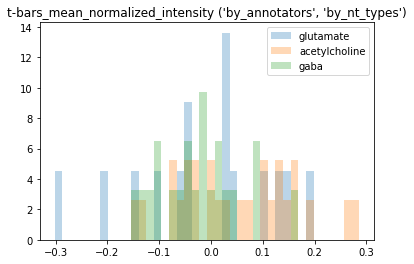

Run t-test for feature t-bars_mean_normalized_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 2.131458932842538, p-value = 0.03909291078768544
Compare acetylcholine and gaba: t-statistics = 1.460925658798004, p-value = 0.15165765181726418
Compare glutamate and gaba: t-statistics = -1.1085721012267202, p-value = 0.2745819885526652


Histogram stats for t-bars_mean_normalized_intensity by annotator a1: 

acetylcholine mean: 0.10828556640323558
acetylcholine stddev: 0.07161707603051468
glutamate mean: 0.03257228240240786
glutamate stddev: 0.14755742022990972
gaba mean: 0.07471329606249075
gaba stddev: 0.07538372936394641


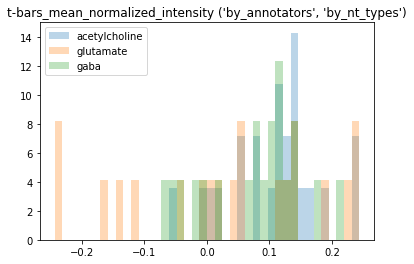

Run t-test for feature t-bars_mean_normalized_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 0.2985812761553911, p-value = 0.7664727634796522
Compare gaba and glutamate: t-statistics = 2.9596397647751225, p-value = 0.004734402970668705
Compare acetylcholine and glutamate: t-statistics = 2.5798148593658214, p-value = 0.013301861504652032


Histogram stats for t-bars_mean_normalized_intensity by annotator a2: 

gaba mean: 0.05001096045046054
gaba stddev: 0.09781906027818152
acetylcholine mean: 0.041875113202397896
acetylcholine stddev: 0.0956930923822469
glutamate mean: -0.03703876663726299
glutamate stddev: 0.10719345848143233


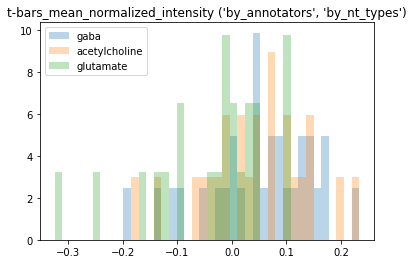

Run t-test for feature cleft_mean_normalized_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -2.9339517411780562, p-value = 0.005717894471071407
Compare glutamate and gaba: t-statistics = 0.9181793642634637, p-value = 0.36518750097724717
Compare acetylcholine and gaba: t-statistics = 4.687112706130346, p-value = 2.6898665613667484e-05


Histogram stats for cleft_mean_normalized_intensity by annotator a0: 

glutamate mean: 0.06251874111718078
glutamate stddev: 0.05492214255539112
acetylcholine mean: 0.12552960000451543
acetylcholine stddev: 0.06661063262817639
gaba mean: 0.048101617532622744
gaba stddev: 0.03526297923584897


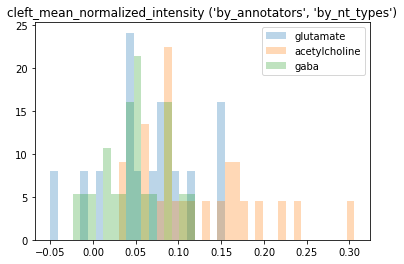

Run t-test for feature cleft_mean_normalized_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 1.4201603026186196, p-value = 0.1631210003576949
Compare acetylcholine and gaba: t-statistics = 3.1040861343535084, p-value = 0.0034530197975359738
Compare glutamate and gaba: t-statistics = 1.6431154676790598, p-value = 0.10860943958932039


Histogram stats for cleft_mean_normalized_intensity by annotator a1: 

acetylcholine mean: 0.10030460258909497
acetylcholine stddev: 0.049839980239385025
glutamate mean: 0.07856368218409453
glutamate stddev: 0.0477798495632414
gaba mean: 0.053561475518322785
gaba stddev: 0.04600315321855522


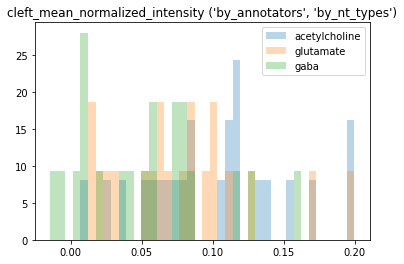

Run t-test for feature cleft_mean_normalized_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = -5.789165779164509, p-value = 4.645778850565403e-07
Compare gaba and glutamate: t-statistics = -3.031229946032571, p-value = 0.003918224000549493
Compare acetylcholine and glutamate: t-statistics = 3.036418217292389, p-value = 0.0040138021648592394


Histogram stats for cleft_mean_normalized_intensity by annotator a2: 

gaba mean: 0.05541962536597209
gaba stddev: 0.03461302727184099
acetylcholine mean: 0.1528294149920946
acetylcholine stddev: 0.07889721242947004
glutamate mean: 0.09206332464896422
glutamate stddev: 0.04902410483299249


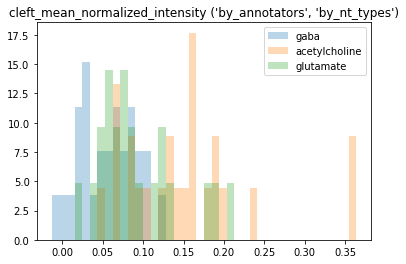

Run t-test for feature t-bars_median_normalized_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -1.5430328894432785, p-value = 0.13089903786208767
Compare glutamate and gaba: t-statistics = 0.5170044748727441, p-value = 0.6085001627281064
Compare acetylcholine and gaba: t-statistics = 2.7283467187736528, p-value = 0.009047057832347903


Histogram stats for t-bars_median_normalized_intensity by annotator a0: 

glutamate mean: -0.01197019856528112
glutamate stddev: 0.1406671629407488
acetylcholine mean: 0.0543980902501037
acetylcholine stddev: 0.1223951305682733
gaba mean: -0.031530900090932394
gaba stddev: 0.07839205516466914


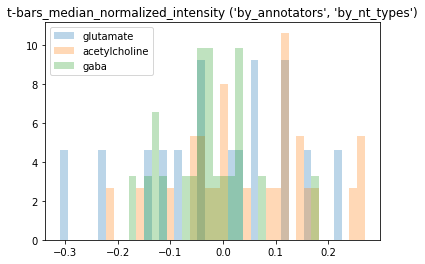

Run t-test for feature t-bars_median_normalized_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 1.7776892977807859, p-value = 0.08287285970324189
Compare acetylcholine and gaba: t-statistics = 1.1080090806030016, p-value = 0.27431573982901075
Compare glutamate and gaba: t-statistics = -1.0168667551386177, p-value = 0.31564771397729297


Histogram stats for t-bars_median_normalized_intensity by annotator a1: 

acetylcholine mean: 0.10738270411261501
acetylcholine stddev: 0.07820557890155103
glutamate mean: 0.041172120839239046
glutamate stddev: 0.15293257194844942
gaba mean: 0.08085079499144956
gaba stddev: 0.07443825481143497


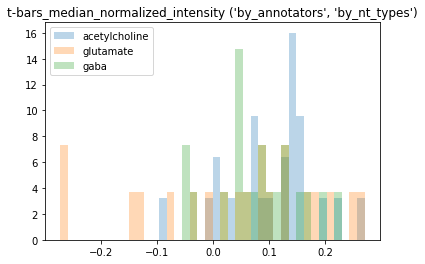

Run t-test for feature t-bars_median_normalized_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 0.34020922851670093, p-value = 0.7350962864309272
Compare gaba and glutamate: t-statistics = 3.1765440793516966, p-value = 0.00257925179595111
Compare acetylcholine and glutamate: t-statistics = 2.5644731544468984, p-value = 0.013822563868584933


Histogram stats for t-bars_median_normalized_intensity by annotator a2: 

gaba mean: 0.056333934205795896
gaba stddev: 0.10390788188258208
acetylcholine mean: 0.045902228172305416
acetylcholine stddev: 0.11485035968668401
glutamate mean: -0.040363124735453386
glutamate stddev: 0.10764230222988469


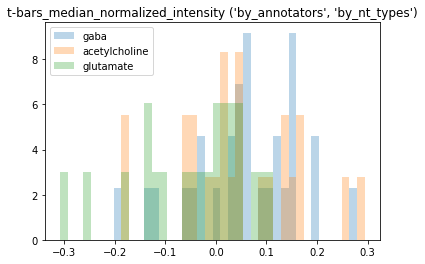

Run t-test for feature cleft_median_normalized_intensity by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -2.9167659958959034, p-value = 0.005979325844166957
Compare glutamate and gaba: t-statistics = 0.8513534298294131, p-value = 0.4007089386153787
Compare acetylcholine and gaba: t-statistics = 4.636468693880047, p-value = 3.1708446827468155e-05


Histogram stats for cleft_median_normalized_intensity by annotator a0: 

glutamate mean: 0.06293399387090247
glutamate stddev: 0.05449883799870227
acetylcholine mean: 0.12415169251305112
acetylcholine stddev: 0.0647112096223713
gaba mean: 0.04979084363163597
gaba stddev: 0.03414494169246323


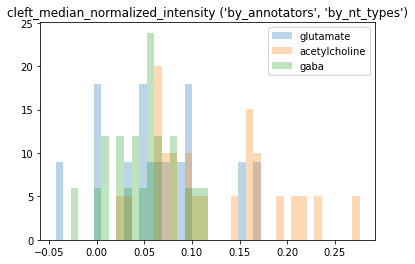

Run t-test for feature cleft_median_normalized_intensity by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 1.4086258424818252, p-value = 0.16648462596797162
Compare acetylcholine and gaba: t-statistics = 2.5814199204845227, p-value = 0.013513186839976186
Compare glutamate and gaba: t-statistics = 1.3084867870250052, p-value = 0.198567456281982


Histogram stats for cleft_median_normalized_intensity by annotator a1: 

acetylcholine mean: 0.09332470853811965
acetylcholine stddev: 0.053005452847260104
glutamate mean: 0.07152870347578402
glutamate stddev: 0.044939365529173776
gaba mean: 0.05095908592614479
gaba stddev: 0.05172810388959759


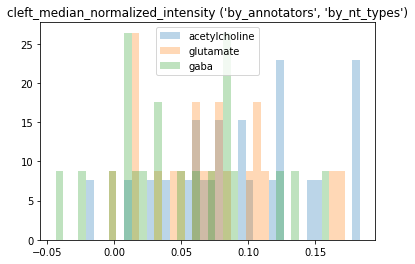

Run t-test for feature cleft_median_normalized_intensity by annotator a2: 

Compare gaba and acetylcholine: t-statistics = -5.4969414220487, p-value = 1.3094024448561278e-06
Compare gaba and glutamate: t-statistics = -2.6897810988479893, p-value = 0.009805337454409558
Compare acetylcholine and glutamate: t-statistics = 2.934618442036947, p-value = 0.0052896363857832


Histogram stats for cleft_median_normalized_intensity by annotator a2: 

gaba mean: 0.057031043736085606
gaba stddev: 0.03386511143132567
acetylcholine mean: 0.1486891823551544
acetylcholine stddev: 0.07840648883752414
glutamate mean: 0.08981426143113737
glutamate stddev: 0.050332604442451793


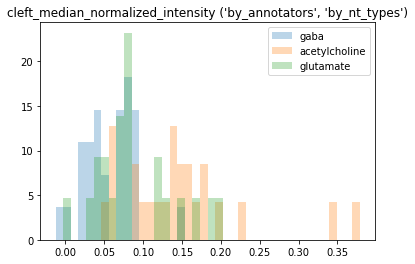

Run t-test for feature post_count by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = 0.33554502052342877, p-value = 0.7390123989630311
Compare glutamate and gaba: t-statistics = -2.065655409528979, p-value = 0.04654996702578764
Compare acetylcholine and gaba: t-statistics = -2.8340232828027143, p-value = 0.006858369812607331


Histogram stats for post_count by annotator a0: 

glutamate mean: 3.466666666666667
glutamate stddev: 1.4544949486180956
acetylcholine mean: 3.3076923076923075
acetylcholine stddev: 1.4079234782863943
gaba mean: 4.666666666666667
gaba stddev: 1.8082702424807164


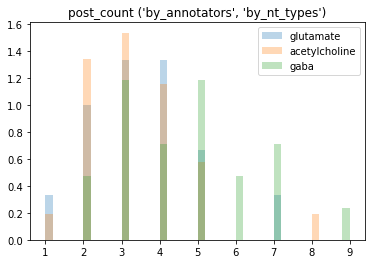

Run t-test for feature post_count by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = -0.5269371761140532, p-value = 0.6010768509484659
Compare acetylcholine and gaba: t-statistics = -0.33695486703805916, p-value = 0.7378697474399969
Compare glutamate and gaba: t-statistics = 0.21932000780317534, p-value = 0.8275746090758229


Histogram stats for post_count by annotator a1: 

acetylcholine mean: 3.652173913043478
acetylcholine stddev: 1.4922610697156968
glutamate mean: 3.9
glutamate stddev: 1.5132745950421556
gaba mean: 3.8
gaba stddev: 1.2884098726725126


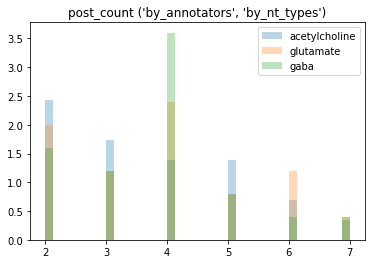

Run t-test for feature post_count by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 2.2479786497259657, p-value = 0.028929376300295816
Compare gaba and glutamate: t-statistics = 2.249635441850776, p-value = 0.028998076159221356
Compare acetylcholine and glutamate: t-statistics = 0.2520516513400131, p-value = 0.8021748012188972


Histogram stats for post_count by annotator a2: 

gaba mean: 4.827586206896552
gaba stddev: 1.641466239367159
acetylcholine mean: 3.9166666666666665
acetylcholine stddev: 1.1516895800904376
glutamate mean: 3.8181818181818183
glutamate stddev: 1.4345212580054092


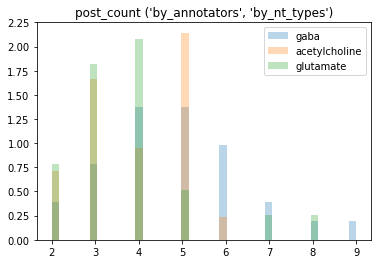

Run t-test for feature num_vesicles by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = -1.9531721035338592, p-value = 0.058000962961668706
Compare glutamate and gaba: t-statistics = -1.8929176286776495, p-value = 0.06690677498058424
Compare acetylcholine and gaba: t-statistics = -0.01468765246879428, p-value = 0.9883462971750581


Histogram stats for num_vesicles by annotator a0: 

glutamate mean: 14.733333333333333
glutamate stddev: 11.664571240393803
acetylcholine mean: 22.0
acetylcholine stddev: 10.908712114635714
gaba mean: 22.047619047619047
gaba stddev: 10.69257058707761


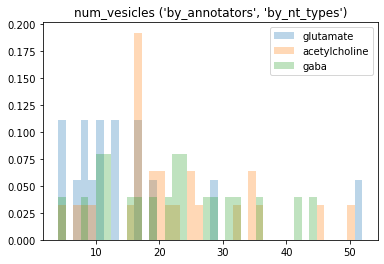

Run t-test for feature num_vesicles by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = 0.7113915022525019, p-value = 0.4808697368391963
Compare acetylcholine and gaba: t-statistics = 0.8232055364657984, p-value = 0.4151537934407409
Compare glutamate and gaba: t-statistics = 0.02779414936219508, p-value = 0.9779717907690985


Histogram stats for num_vesicles by annotator a1: 

acetylcholine mean: 22.82608695652174
acetylcholine stddev: 14.953993719617232
glutamate mean: 19.7
glutamate stddev: 12.896123448540651
gaba mean: 19.6
gaba stddev: 8.924124606929244


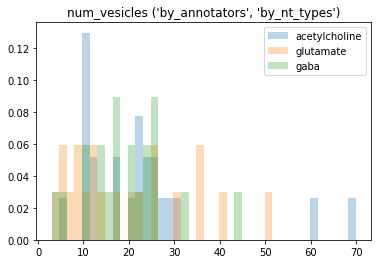

Run t-test for feature num_vesicles by annotator a2: 

Compare gaba and acetylcholine: t-statistics = -1.08207233226705, p-value = 0.28431028850153606
Compare gaba and glutamate: t-statistics = -1.8255252153945887, p-value = 0.0740194399655966
Compare acetylcholine and glutamate: t-statistics = -0.8200289536690701, p-value = 0.4166198665623143


Histogram stats for num_vesicles by annotator a2: 

gaba mean: 15.482758620689655
gaba stddev: 9.290784049372842
acetylcholine mean: 18.208333333333332
acetylcholine stddev: 8.529259281373083
glutamate mean: 20.454545454545453
glutamate stddev: 9.637649999904601


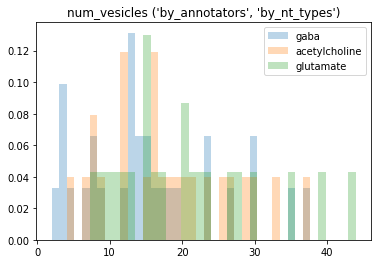

Run t-test for feature vesicle_sizes by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = 1.0826379883104142, p-value = 0.2792990555636382
Compare glutamate and gaba: t-statistics = 2.8146468680312955, p-value = 0.00502391376490841
Compare acetylcholine and gaba: t-statistics = 1.873817625546894, p-value = 0.06123769118506733


Histogram stats for vesicle_sizes by annotator a0: 

glutamate mean: 89.75113122171946
glutamate stddev: 59.999370743955005
acetylcholine mean: 84.46853146853147
acetylcholine stddev: 62.108697204761796
gaba mean: 77.94168466522679
gaba stddev: 46.484243957009525


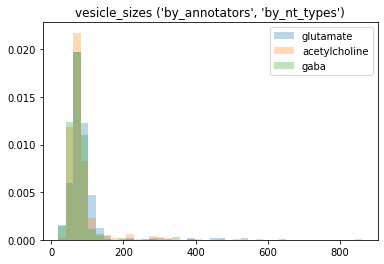

Run t-test for feature vesicle_sizes by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = -2.9650436312012065, p-value = 0.003104789121297656
Compare acetylcholine and gaba: t-statistics = 1.1994040250787252, p-value = 0.23068137527933932
Compare glutamate and gaba: t-statistics = 4.184056684187513, p-value = 3.18730269233029e-05


Histogram stats for vesicle_sizes by annotator a1: 

acetylcholine mean: 71.65523809523809
acetylcholine stddev: 40.24246982137482
glutamate mean: 79.55329949238579
glutamate stddev: 39.485311177170935
gaba mean: 68.66071428571429
gaba stddev: 33.11312840791676


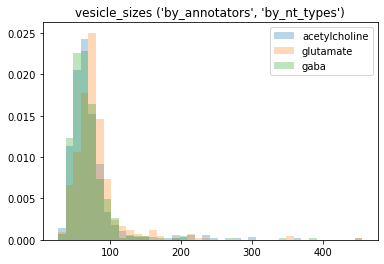

Run t-test for feature vesicle_sizes by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 0.20586284246824751, p-value = 0.8369454497592522
Compare gaba and glutamate: t-statistics = -1.0606746221971033, p-value = 0.2891233009563477
Compare acetylcholine and glutamate: t-statistics = -1.103339823236405, p-value = 0.27017953947087747


Histogram stats for vesicle_sizes by annotator a2: 

gaba mean: 65.01113585746103
gaba stddev: 34.15277298725151
acetylcholine mean: 64.44622425629291
acetylcholine stddev: 46.63662505967358
glutamate mean: 67.89555555555556
glutamate stddev: 46.36009038221252


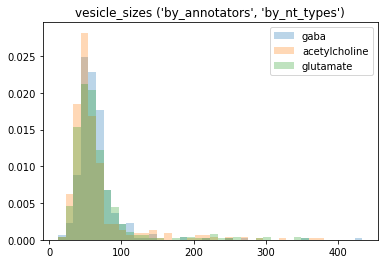

Run t-test for feature vesicle_eccentricities by annotator a0: 

Compare glutamate and acetylcholine: t-statistics = 0.35909788594824593, p-value = 0.7196176958201204
Compare glutamate and gaba: t-statistics = -1.0781078421346677, p-value = 0.28136680075530823
Compare acetylcholine and gaba: t-statistics = -1.8187559058496914, p-value = 0.06923812714093736


Histogram stats for vesicle_eccentricities by annotator a0: 

glutamate mean: 0.5153699772065409
glutamate stddev: 0.1256905881628902
acetylcholine mean: 0.5115520226358119
acetylcholine stddev: 0.1371685966432885
gaba mean: 0.5271741835720635
gaba stddev: 0.137387674306688


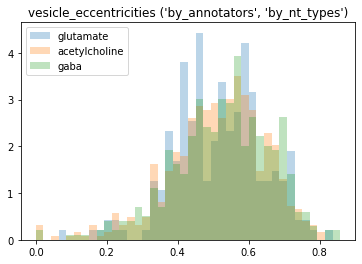

Run t-test for feature vesicle_eccentricities by annotator a1: 

Compare acetylcholine and glutamate: t-statistics = -0.20903425101548076, p-value = 0.8344679258046376
Compare acetylcholine and gaba: t-statistics = 0.5071538615850165, p-value = 0.6121690676204612
Compare glutamate and gaba: t-statistics = 0.6779264027946136, p-value = 0.49801837943055616


Histogram stats for vesicle_eccentricities by annotator a1: 

acetylcholine mean: 0.4224277161734122
acetylcholine stddev: 0.19232769092949437
glutamate mean: 0.42507633893386365
glutamate stddev: 0.18658970768478492
gaba mean: 0.4159216163490969
gaba stddev: 0.1915018422296988


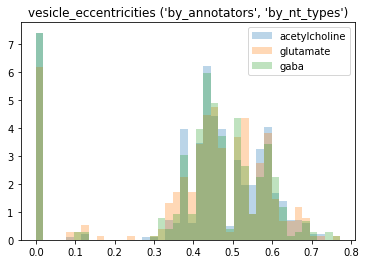

Run t-test for feature vesicle_eccentricities by annotator a2: 

Compare gaba and acetylcholine: t-statistics = 3.889638321246166, p-value = 0.00010792166790441426
Compare gaba and glutamate: t-statistics = 4.107784743723976, p-value = 4.360031844757177e-05
Compare acetylcholine and glutamate: t-statistics = 0.12787094311803082, p-value = 0.8982801558415581


Histogram stats for vesicle_eccentricities by annotator a2: 

gaba mean: 0.5386157520506775
gaba stddev: 0.15451627925326428
acetylcholine mean: 0.49406283846927235
acetylcholine stddev: 0.18505383258725916
glutamate mean: 0.49249056681615816
glutamate stddev: 0.1807309232566534


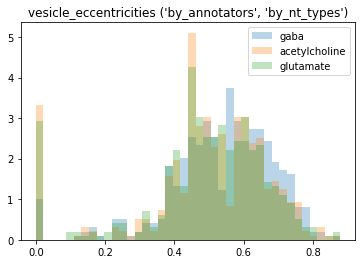

In [6]:
grouped_features = group_features_by_conditions(condition)

print(f'All feature conditions: {list(dict(list(grouped_features.values())[0]).keys())}', '\n')

features_by_one_annotator = {}

for feature_name, feature_values_by_condition in grouped_features.items():
    
    annotators = []
    
    # feature_condition = (<annotator>, <neurotransmitter>), e.g. ('c0', 'gaba')
    for i, (feature_condition, feature_values) in enumerate(feature_values_by_condition.items()):
        
        if not(annotators):
            
            annotators.append(feature_condition[0])
            features_by_one_annotator[feature_condition[1]] = feature_values

        if annotators and feature_condition[0] in annotators:
            
            features_by_one_annotator[feature_condition[1]] = feature_values
        
        # reach the last key of feature_values_by_condition
        if annotators and ((i == len(feature_values_by_condition)-1) | (feature_condition[0] not in annotators)):
        
            # plot for this annotator
            print(f'Run t-test for feature {feature_name} by annotator {annotators[-1]}:', '\n')
            
            conduct_t_test(features_by_one_annotator)        
        
            print('\n')
            print(f'Histogram stats for {feature_name} by annotator {annotators[-1]}:', '\n')
            
            plot_histogram(feature_name, condition, features_by_one_annotator, 40)
            
            if (i != len(feature_values_by_condition)-1):
                annotators.append(feature_condition[0])
        
            features_by_one_annotator = {}
            features_by_one_annotator[feature_condition[1]] = feature_values
